# Beecrowd(1128)
## Ir e Vir 
- link para o enunciado: [beecrowd(1128) - Ir e Vir](https://www.beecrowd.com.br/judge/pt/problems/view/1128) 

### Metodos para leitura de variavel

In [8]:
import sys


def input():
    return sys.stdin.buffer.readline().decode('utf-8')


def ri():
    return int(input())


def mi():
    return map(int, input().split())

### Classe de grafo

In [9]:
class Graph:
    def __init__(self, nNodes, edges):
        self.numNodes = nNodes
        self.edges = edges
        self.graph = {node: [] for node in range(1, self.numNodes+1)}

    # bfs
    def bfs(self, start):
        visited = []
        queue = [start]
        while queue:
            node = queue.pop(0)
            if node not in visited:
                visited.append(node)
                queue.extend(self.graph[node])
        return visited

    # add bidirected edge
    def add_edge(self, node1, node2):
        self.graph[node1].append(node2)
        self.graph[node2].append(node1)

    # add directed edge
    def add_directed_edge(self, node1, node2):
        self.graph[node1].append(node2)


    # chek if graph is connected
    def is_connected(self):
        for node in self.graph:
            visited = self.bfs(node)
            if len(visited) != self.numNodes:
                return False
        return True

### Corpo da main

In [ ]:
# the entry ends when n = e = 0
while True:
    n, m = mi()

    if n == 0 and m == 0:
        break

    # create graph
    graph = Graph(n, [])

    for i in range(m):
        node1, node2, mao = mi()

        # if mao == 1 add directed edge else add bidirected edge
        if mao == 1:
            graph.add_directed_edge(node1, node2)
        else:
            graph.add_edge(node1, node2)

    # check if it is connected
    print(int(graph.is_full_connected()))

### Aviso
O codigo em python foi feito para poder explicar melhor o passo a passo e a logica, porem visto o juiz eletronico na questao requerir um certo tempo limite, o codigo em python acusava TLE (Time limit exceeded). Assim foi feito um codigo em C para ser enviado para o aceite

In [ ]:
### Includes e variaveis globais

In [ ]:
#include <stdio.h>
#include <stdlib.h>

#define vertex int

static int cnt;
int pre[2002];

// int *presenca;

typedef struct graph
{
    int V;
    int A;
    int **adj;
    int **tc;
} * Graph;

### Metodo de inicializacao da matriz e metodos dos grafos

In [ ]:
// initializes a matrix with a val
static int **MATRIXint(int r, int c, int val)
{
    int **m = malloc(r * sizeof(int *));
    for (vertex i = 0; i < r; ++i)
        m[i] = malloc(c * sizeof(int));
    for (vertex i = 0; i < r; ++i)
        for (vertex j = 0; j < c; ++j)
            m[i][j] = val;
    return m;
}

// initializes the graph
Graph GRAPHinit(int V)
{
    Graph G = malloc(sizeof *G);
    G->V = V;
    G->A = 0;
    G->adj = MATRIXint(V, V, 0);
    return G;
}

// insert edge into graph
void GRAPHinsertArc(Graph G, vertex v, vertex w, int p)
{
    // directed
    if (p == 1)
    {
        if (G->adj[v][w] == 0)
        {
            G->adj[v][w] = 1;
            G->A++;
        }
    }
    // bidirected
    else if (p == 2)
    {
        if (G->adj[v][w] == 0)
        {
            G->adj[v][w] = 1;
            G->adj[w][v] = 1;
            G->A++;
        }
    }
}

// remove edge from graph
void GRAPHremoveArc(Graph G, vertex v, vertex w)
{
    if (G->adj[v][w] == 1)
    {
        G->adj[v][w] = 0;
        G->A--;
    }
}

// destroy graph
void GRAPHdestroy(Graph G)
{
    free(G->adj);
    free(G->tc);
}

void GRAPHtc(Graph G)
{
    int i, s, t;
    G->tc = MATRIXint(G->V, G->V, 0);

    // cópia do grafo para o tc
    for (s = 0; s < G->V; s++)
    {
        for (t = 0; t < G->V; t++)
        {
            G->tc[s][t] = G->adj[s][t];
        }
    }
    // fimda copia

    for (s = 0; s < G->V; s++)
        G->tc[s][s] = 1;

    for (i = 0; i < G->V; i++)
    {
        for (s = 0; s < G->V; s++)
        {
            if (G->tc[s][i] == 1)
            {
                for (t = 0; t < G->V; t++)
                {
                    if (G->tc[i][t] == 1)
                        G->tc[s][t] = 1;
                }
            }
        }
    }
}

int GRAPHreach(Graph G, int s, int t)
{
    return G->tc[s][t];
}

void GraphShowTC(Graph G)
{
    for (int i = 0; i < G->V; i++)
    {
        printf("%d:", i);
        for (int j = 0; j < G->V; j++)
        {
            if (G->tc[i][j] != 0)
                printf(" %d", j);
        }
        printf("\n");
    }
    printf("\n");
}

void GraphShow(Graph G)
{
    for (int i = 0; i < G->V; i++)
    {
        printf("%d:", i);
        for (int j = 0; j < G->V; j++)
        {
            if (G->adj[i][j] != 0)
                printf(" %d", j);
        }
        printf("\n");
    }
    printf("\n");
}

### Corpo da main

In [ ]:
int main()
{
    int N, M, V, W, P;

    while (1)
    {
        scanf("%d%d", &N, &M);
        if (N == 0 && M == 0)
            break;
        Graph Ruas;
        Ruas = GRAPHinit(N + 1);

        for (int i = 1; i <= M; i++)
        {
            scanf("%d%d%d", &V, &W, &P);
            GRAPHinsertArc(Ruas, V, W, P);
        }

        for (int i = 1; i <= N; i++)
        {
            pre[i] = 0;
        }
        GRAPHtc(Ruas);

        // GraphShow(Ruas);
        // GraphShowTC(Ruas);

        int resposta = 1, compara1, compara2;

        for (int i = 1; i <= N; i++)
        {
            for (int j = 1; j <= N; j++)
            {
                if (pre[i] != 1 || pre[j] != 1)
                {
                    compara1 = GRAPHreach(Ruas, i, j);
                    compara2 = GRAPHreach(Ruas, j, i);
                    pre[i] = 1;
                    pre[j] = 1;
                    // printf("i: %d j: %d | c1: %d  c2: %d\n",i,j, compara1, compara2);
                    if (compara1 != 1 || compara2 != 1)
                    {

                        resposta = 0;
                        break;
                    }
                }
            }
        }

        // printf("saiu do for\n");

        printf("%d\n", resposta);
        GRAPHdestroy(Ruas);
        // scanf("%d%d", &N, &M);
    }

    return 0;
}

### Comprovação accepted
link para submissão: https://www.beecrowd.com.br/judge/pt/runs/code/28666614
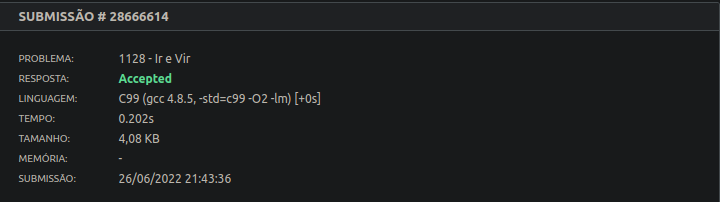